## Housing Price Prediction


### Problem Statement 
A real estate company has a dataset containing the price of properties in Delhi region. They want our company to use thier dataset and can predict the house price base on the import factors such as area, bedrooms, parking,...

### To Do List
* Indentify the important feature which are affecting the house price
* Create and Train the Machine Learning Model to predict the house price
* Evaluate the accuracy of the model

In [1]:
import pandas as pd

## Step I. Read and understand the dataset

First step, we will use the pandas library to read the dataset

In [2]:
housedf = pd.read_csv("./data/Housing.csv")

In [3]:
housedf.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
housedf.shape

(545, 13)

We had the dataset had 545 records and 13 feature:
1. price: the house price
2. area: the area of the house 
3. bedrooms: number of the bedrooms
4. bathrooms: number of the bathrooms
5. stories: number of floors of the house
6. mainroad: are the house near main road
7. guestroom: had guest house of not
8. basement: had basement of not
9. hotwaterheating: had hotwater heating system or not
10. airconditioning: had air conditioning system or not
11. parking: the number of the parking
12. prefarea: had yard or not
13. furnishingstatus: furnishing status

After see this, we can determined that the target feature is price and the feature is area, bedrooms, bathrooms, ...

In [5]:
housedf.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Step II: Data Cleaning

Next we will go to data cleaning step

### What is data cleaning?

    Data cleaning is the process if fixing or remove incorrect, error, wrong format, duplicate in the dataset.

### Why we need data cleaning?

    When we combining multiple data sources, our datasets will had many data which are incorrect, error, duplicate, ... 
    If we don't have data cleaning, the data is incorrect and the outcome and algorithm will be unreliable.

### Five characteristics of quality data: <br>

* Validity: The degree to which your data conforms to defined business rules or constraints.
* Accuracy: Ensure your data is close to the true values.
* Completeness: The degree to which all required data is known.
* Consistency: Ensure your data is consistent within the same dataset and/or across multiple data sets.
* Uniformity: The degree to which the data is specified using the same unit of measure.

### How do you clean data?<br>
* Step 1: Remove duplicate or irrelevant observations
* Step 2: Fix structural errors
* Step 3: Filter unwanted outliers
* Step 4: Handle missing data
* Step 5: Validate and QA

### Let coding

#### Step 1: We will remove the records which are duplicate in our dataset

In [6]:
housedf = housedf.drop_duplicates()
housedf.shape

(545, 13)

We can see the dataset shape is not change. It means there are no duplicate records in our dataset.

#### Step 2: Fix structural errors.

In [7]:
housedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 59.6+ KB


We will check the name of columns and the data type of each column.

#### Step 3: Filter outliers

# 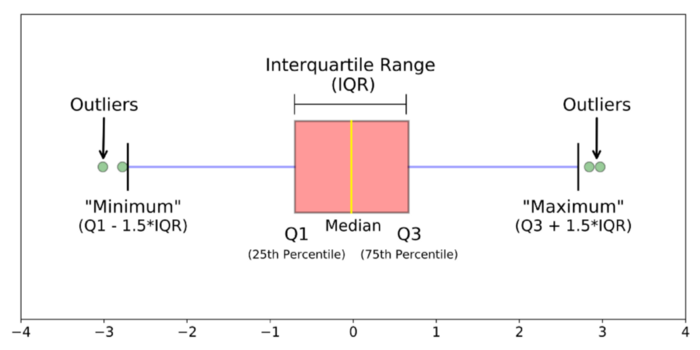

For filtering outliers, we will use the IQR method. The IQR is the interquartile range. The interquartile range is the range of the 25th percentiles (Q1) and 75th percentiles (Q3). <br>
* Step 1: Calculate the first quartile (Q1) and third quartile (Q3) of the dataset.
* Step 2: Calculate the interquartile range (IQR) as Q3 - Q1.
* Step 3: Calculate the upper and lower limits of the outliers as Q3 + 1.5 * IQR and Q1 - 1.5 * IQR.
* Step 4: Remove the outliers from the dataset.

Now, I will ourlier analysis with 4 feature is: price, bedrooms, bathroom and stories using matplotlib and seaborn library

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\nguye\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nguye\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nguye\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nguye\anaconda3\lib\si

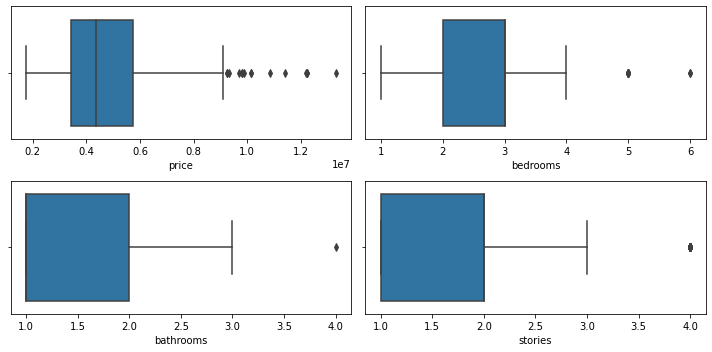

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))
plt1 = sns.boxplot(housedf['price'], ax=axs[0, 0])
plt3 = sns.boxplot(housedf['bedrooms'], ax=axs[0, 1])
plt1 = sns.boxplot(housedf['bathrooms'], ax=axs[1, 0])
plt2 = sns.boxplot(housedf['stories'], ax=axs[1, 1])
plt.tight_layout()

C:\Users\nguye\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nguye\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


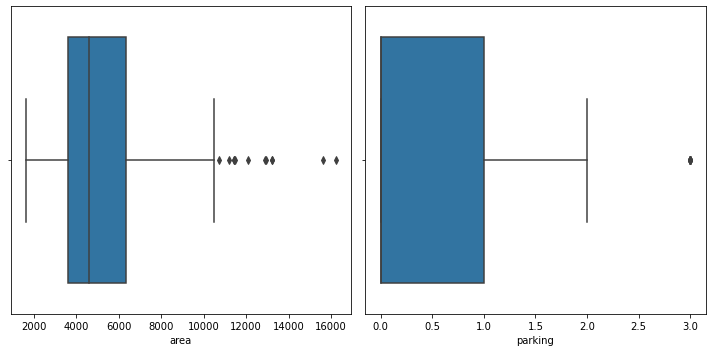

In [10]:
#TO DO: From the example above, perform outlier analysis for 2 features: area and parking features
# sns.boxplot(housedf['area'])
# sns.boxplot(housedf['parking'])
fig2, axs = plt.subplots(1, 2, figsize=(10, 5))
plt1 = sns.boxplot(housedf['area'], ax=axs[0])
plt3 = sns.boxplot(housedf['parking'], ax=axs[1])
plt.tight_layout()


We can see the Price feature and [............] feature have considerable outliers.

Remember: Just because an outlier exists, doesn’t mean it is incorrect.

Now, we will remove the outliers from the dataset in Price feature and [............] feature.

{'whiskers': [<matplotlib.lines.Line2D at 0x23300179250>,
 'caps': [<matplotlib.lines.Line2D at 0x23300179910>,
 'boxes': [<matplotlib.lines.Line2D at 0x23300168eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x23300179fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23300185370>],
 'means': []}

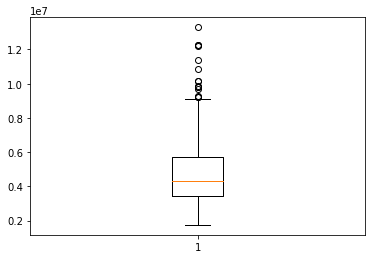

In [11]:
# The price before filtering the outliers
plt.boxplot(housedf.price)

{'whiskers': [<matplotlib.lines.Line2D at 0x233002159a0>,
 'caps': [<matplotlib.lines.Line2D at 0x233002240a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23300215640>],
 'medians': [<matplotlib.lines.Line2D at 0x23300224760>],
 'fliers': [<matplotlib.lines.Line2D at 0x23300224ac0>],
 'means': []}

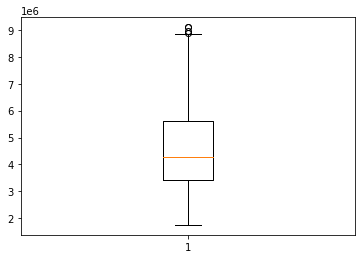

In [12]:
# Outlier treatment for price and visualize the distribution of the price after filtering the outliers
Q1 = housedf.price.quantile(0.25)
Q3 = housedf.price.quantile(0.75)
IQR = Q3 - Q1
housedf = housedf[(housedf.price >= Q1 - 1.5*IQR) &(housedf.price <= Q3 + 1.5*IQR)]
plt.boxplot(housedf.price)

In [13]:
#TO DO: Visualize the distribution of the [.......] before filtering the outliers

In [14]:
#TO DO: Outlier treatment for [........] and visualize the distribution of the [.........] after filtering the outliers

C:\Users\nguye\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nguye\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nguye\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nguye\anaconda3\lib\si

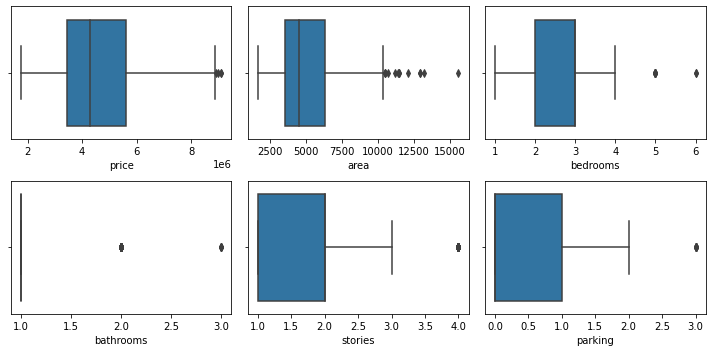

In [15]:
# Outlier Analysis
fig, axs = plt.subplots(2, 3, figsize=(10, 5))
plt1 = sns.boxplot(housedf['price'], ax=axs[0, 0])
plt2 = sns.boxplot(housedf['area'], ax=axs[0, 1])
plt3 = sns.boxplot(housedf['bedrooms'], ax=axs[0, 2])
plt1 = sns.boxplot(housedf['bathrooms'], ax=axs[1, 0])
plt2 = sns.boxplot(housedf['stories'], ax=axs[1, 1])
plt3 = sns.boxplot(housedf['parking'], ax=axs[1, 2])
plt.tight_layout()

#### Step 4: Handle missing data

We will check and find the missing data in the dataset.

In [16]:
housedf.isnull().sum()*100/housedf.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

We can see there are no NULL values in the dataset, the dataset it is clean.

#### Step 5: Validate and QA

## Step III: Exploratory Data Analytics (EDA)

Let's now spend some time doing what is arguably the most important step - understanding the data.

If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

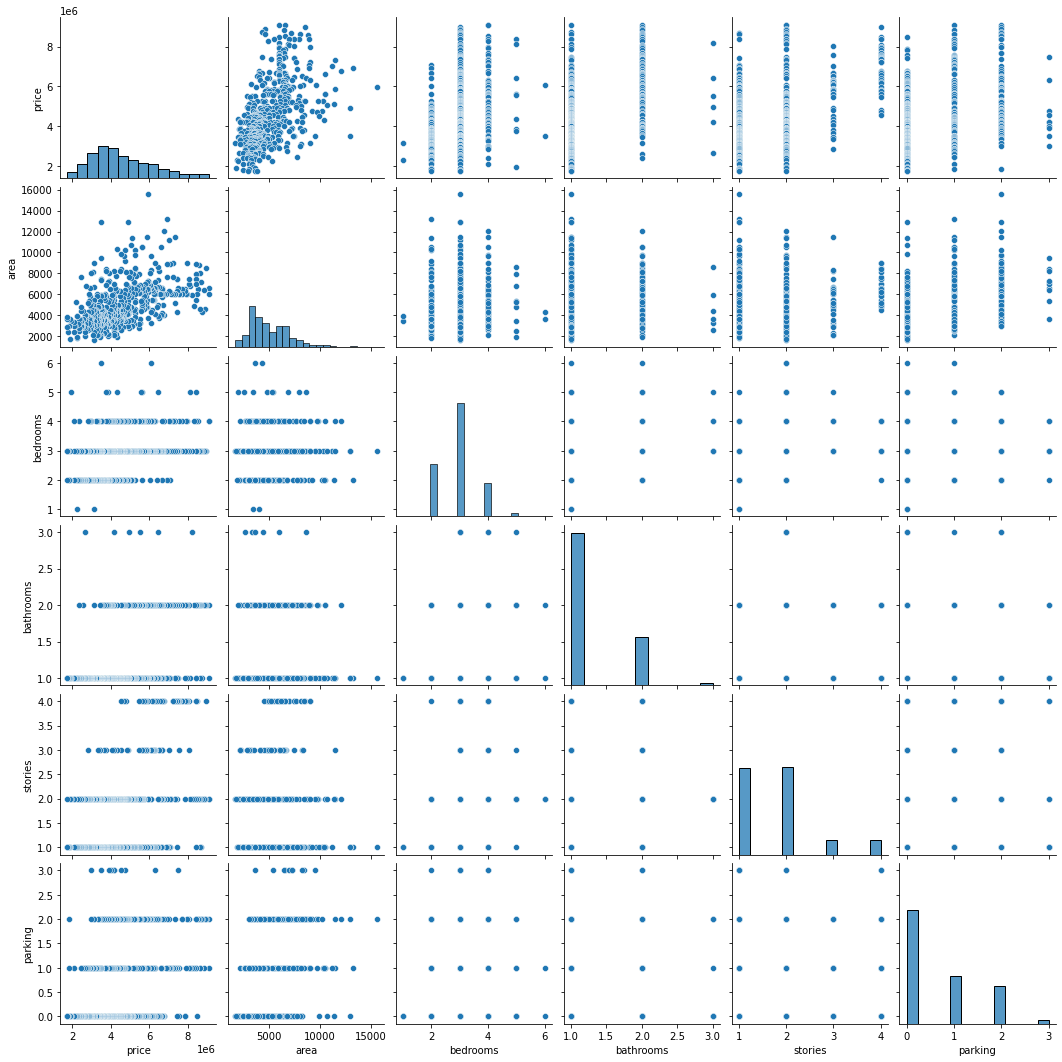

In [17]:
sns.pairplot(housedf)
plt.show()

### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

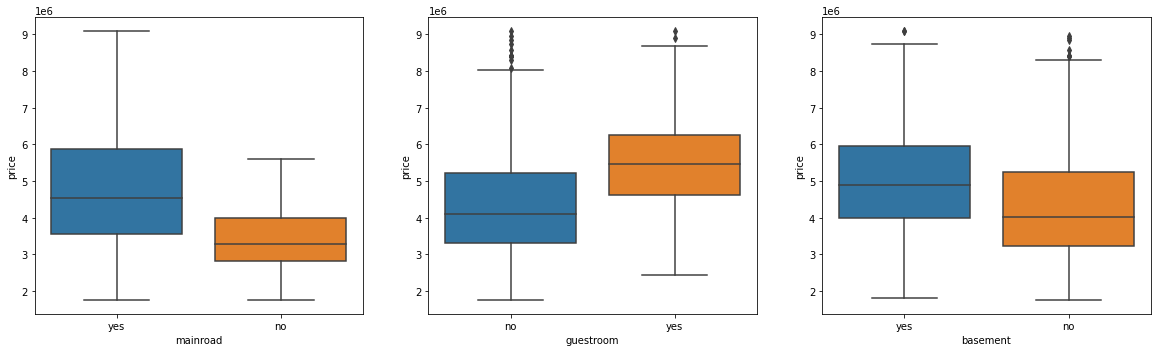

In [18]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housedf)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housedf)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housedf)
plt.show()

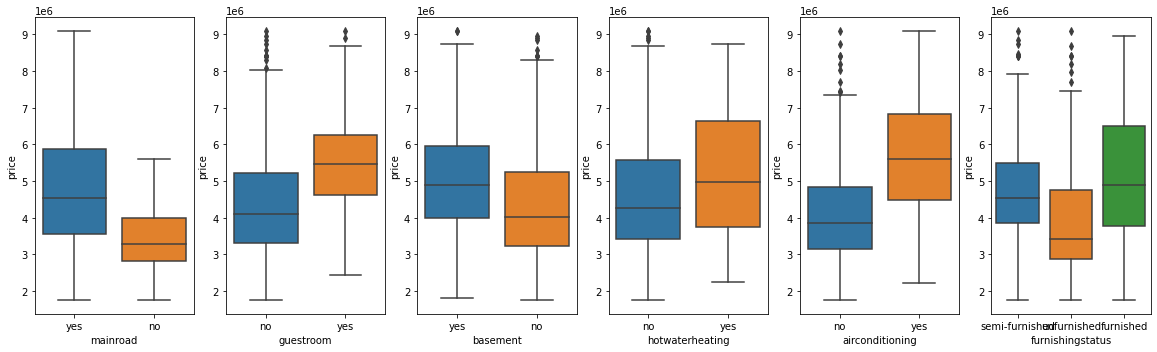

In [19]:
# TO DO: EDA 3 categorical variables: hotwaterheating, airconditioning and furnishingstatus|
plt.figure(figsize=(20, 12))
plt.subplot(2,6,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housedf)
plt.subplot(2,6,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housedf)
plt.subplot(2,6,3)
sns.boxplot(x = 'basement', y = 'price', data = housedf)
plt.subplot(2,6,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housedf)
plt.subplot(2,6,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housedf)
plt.subplot(2,6,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housedf)
plt.show()


We can also visualise some of these categorical features parallely by using the hue argument. Below is the plot for furnishingstatus with airconditioning as the hue.

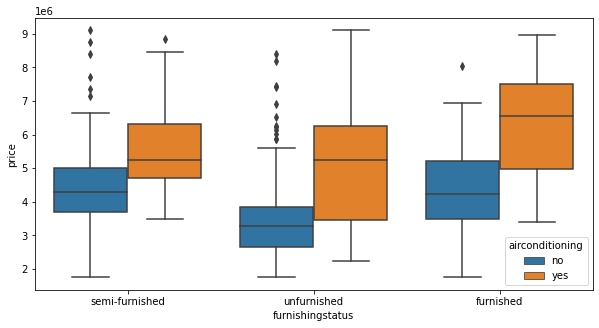

In [20]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='furnishingstatus', y='price', hue='airconditioning', data=housedf)
plt.show()

In [21]:
# TO DO: Try to visualize the relationship between some features and the price

## Step IV: Data Preparation

* You can see that your dataset has many columns with values as 'Yes' or 'No'.

* But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [22]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housedf[varlist] = housedf[varlist].apply(binary_map)

# Check the housing dataframe now
housedf.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


### Dummy Variables

The variable furnishingstatus has three levels. We need to convert these levels into integer as well.

For this, we will use something called dummy variables.

In [23]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(housedf['furnishingstatus'])

# Check what the dataset 'status' looks like
status.head()

,furnished,semi-furnished,unfurnished
15,0,1,0
16,0,0,1
17,1,0,0
18,1,0,0
19,0,1,0


Now, you don't need three columns. You can drop the furnished column, as the type of furnishing can be identified with just the last two columns where —

* 00 will correspond to furnished
* 01 will correspond to unfurnished
* 10 will correspond to semi-furnished

In [24]:
# Add the results to the original housing dataframe

housedf = pd.concat([housedf, status], axis = 1)

# Now let's see the head of our dataframe.

housedf.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnished,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,0,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,1,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,1,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,0,1,0


In [25]:
# Drop 'furnishingstatus' as we have created the dummies for it

housedf.drop(['furnishingstatus'], axis=1, inplace=True)

housedf.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,1,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,1,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,0,1,0


### Splitting the Data into Training and Testing Sets

In [26]:
import numpy as np
import sklearn

In [27]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(42)
df_train, df_test = train_test_split(housedf, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features
As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for area, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling
2. Standardisation (mean-0, sigma-1) <br>
    x = X - mean(X) / sigma(X)
    
This time, we will use MinMax scaling.

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


<ipython-input-30-69598f7bd68f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
C:\Users\nguye\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [31]:
df_train.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
48,0.776190,0.189964,0.4,0.5,0.333333,1,0,1,0,0,0.333333,0,0,0,1
465,0.176190,0.154122,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,0,0,1
144,0.523810,0.218638,0.6,0.0,0.333333,1,1,1,0,1,0.333333,0,1,0,0
395,0.238095,0.139785,1.0,0.0,0.333333,1,0,0,0,0,0.333333,0,0,0,1
254,0.371429,0.205018,0.6,0.0,0.333333,1,0,0,0,1,0.666667,0,0,1,0


In [32]:
df_train.describe()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,0.386021,0.241122,0.389757,0.125337,0.261456,0.846361,0.172507,0.350404,0.048518,0.309973,0.219227,0.210243,0.242588,0.458221,0.299191
std,0.212167,0.143626,0.144831,0.226142,0.277672,0.361089,0.378331,0.477741,0.215147,0.463107,0.282378,0.408031,0.429227,0.498924,0.458522
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.238095,0.136559,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.342857,0.204301,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.523810,0.327957,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


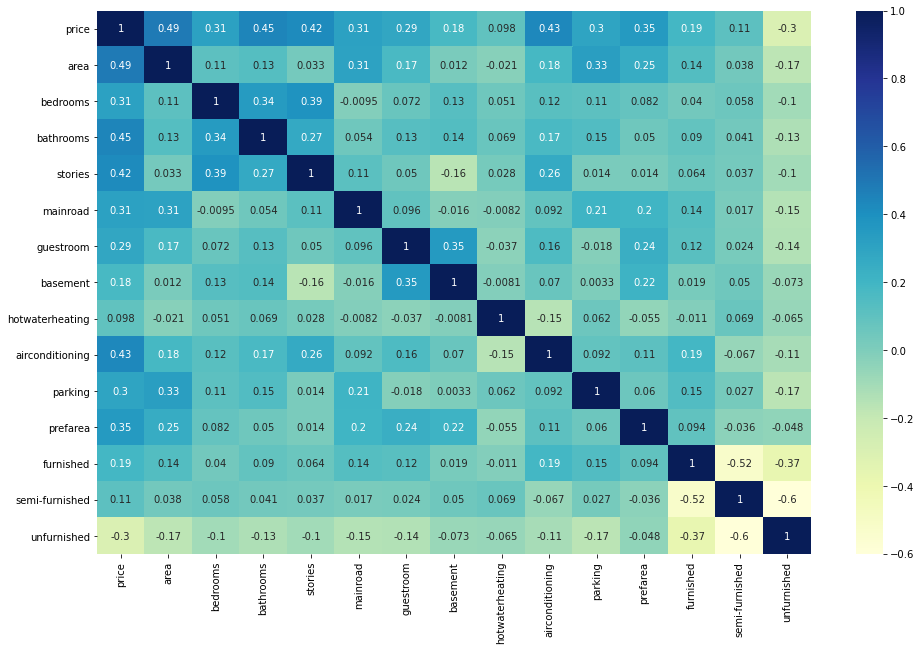

In [33]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize=(16, 10))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()


As you might have noticed, area seems to the correlated to price the most. Let's see a pairplot for area vs price.

Dividing into X and Y sets for the model building

In [34]:
y_train = df_train.drop(['price'], axis = 1)
X_train = df_train


### Model Building

This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

### RFE

Recursive feature elimination

In [35]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [36]:
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [37]:
rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [38]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('price', False, 9),
 ('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', False, 7),
 ('stories', True, 1),
 ('mainroad', False, 6),
 ('guestroom', False, 5),
 ('basement', True, 1),
 ('hotwaterheating', True, 1),
 ('airconditioning', False, 4),
 ('parking', False, 2),
 ('prefarea', False, 3),
 ('furnished', True, 1),
 ('semi-furnished', True, 1),
 ('unfurnished', False, 8)]

In [39]:
col = X_train.columns[rfe.support_]
col


Index(['area', 'bedrooms', 'stories', 'basement', 'hotwaterheating',
       'furnished', 'semi-furnished'],
      dtype='object')

In [40]:
X_train.columns[~rfe.support_]


Index(['price', 'bathrooms', 'mainroad', 'guestroom', 'airconditioning',
       'parking', 'prefarea', 'unfurnished'],
      dtype='object')

### Building model and visualization for 2 features

In [41]:
# Filter the columns with 2 features is price and area
X_train_ex1 = X_train['area'].values.reshape(-1, 1)


In [42]:
# Create new model linear regression
model_1 = LinearRegression()

# Fit dataset
model_1.fit(X_train_ex1, y_train)

# Predict
predict_1 = model_1.predict(X_train_ex1)

# Evaluate  
r2 = model_1.score(X_train_ex1, y_train)
print("R2 score: " + str(r2))


R2 score: 0.1008034442662663


ValueError: x and y must be the same size

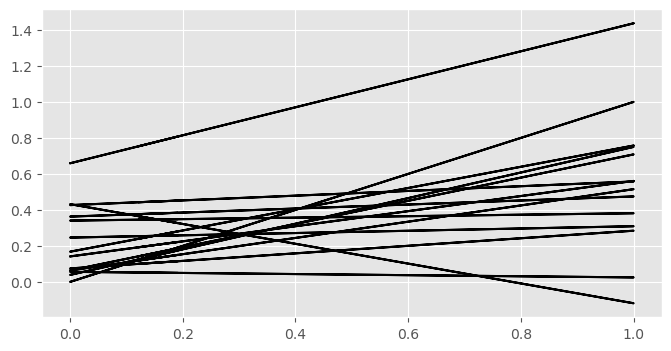

In [43]:
# Plot the result 
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X_train_ex1, predict_1, color='k', label='Regression model')
ax.scatter(X_train_ex1, y_train, edgecolor='k', facecolor='grey',
           alpha=0.7, label='Sample data')
ax.set_ylabel('House Price', fontsize=14)
ax.set_xlabel('Area', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()


In [ ]:
X_train_ex1.shape
predict_1.shape

In [ ]:
# TO DO: Build your own linear regression model with feature price and 1 more other feature.

### Building model using statsmodel, for the detailed statistics

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [ ]:
# Adding a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)


In [ ]:
lm = sm.OLS(y_train, X_train_rfe).fit()

In [ ]:
#Let's see the summary of our linear model
print(lm.summary())


### Predicting the test data set

In [ ]:
y_test = df_test.pop('price')
X_test = df_test


In [ ]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)


In [ ]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[X_train_rfe.columns]


In [ ]:
# Making predictions
y_pred = lm.predict(X_test_rfe)


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label


We can see that the equation of our best fitted line is:

price  = [...] × area + [...] × bathrooms + [...] × stories + [...] × airconditioning + [...] × parking + [...] × prefarea